## 建立詞頻矩陣

In [1]:
s = ['柯文哲為了大巨蛋一事找趙藤雄算帳',
     '柯P因為遠雄遲遲無法處理大巨蛋一事，因此在法庭上與趙藤雄對簿公堂',
     '大巨蛋今天舉辦世運會']

In [10]:
import jieba

In [17]:
jieba.load_userdict('userdict.txt')

In [18]:
corpus = []
for a in s:
    corpus.append(' '.join(jieba.cut(a)))

In [19]:
corpus

['柯文哲 為 了 大巨蛋 一事 找 趙藤雄 算帳',
 '柯P 因 為 遠雄 遲遲 無法 處理 大巨蛋 一事 ， 因此 在 法庭 上 與 趙藤雄 對簿 公堂',
 '大巨蛋 今天 舉辦 世運會']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [27]:
print(vectorizer.get_feature_names())

['一事', '世運會', '今天', '公堂', '因此', '大巨蛋', '對簿', '柯p', '柯文哲', '法庭', '無法', '算帳', '舉辦', '處理', '趙藤雄', '遠雄', '遲遲']


In [24]:
X.toarray()

array([[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [25]:
X.shape

(3, 17)

In [28]:
from sklearn.metrics import euclidean_distances
ed = euclidean_distances(X)
ed

array([[0.        , 3.31662479, 2.64575131],
       [3.31662479, 0.        , 3.74165739],
       [2.64575131, 3.74165739, 0.        ]])

In [29]:
synonym_dic = {}
for s in open('synonym.txt', encoding='utf-8'):
    synonym = s.strip().split('/')
    for w in synonym[1:]:
        synonym_dic[w.lower()] = synonym[0]
synonym_dic

{'柯p': '柯文哲', 'kp': '柯文哲'}

In [30]:
class SynonymCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(SynonymCountVectorizer, self).build_analyzer()
        return lambda doc: (synonym_dic.get(w, w) for w in analyzer(doc))

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = SynonymCountVectorizer()
X = vectorizer.fit_transform(corpus)

In [32]:
print(vectorizer.get_feature_names())

['一事', '世運會', '今天', '公堂', '因此', '大巨蛋', '對簿', '柯文哲', '法庭', '無法', '算帳', '舉辦', '處理', '趙藤雄', '遠雄', '遲遲']


In [33]:
X.toarray()

array([[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [34]:
ed = euclidean_distances(X)
ed

array([[0.        , 3.        , 2.64575131],
       [3.        , 0.        , 3.74165739],
       [2.64575131, 3.74165739, 0.        ]])

In [35]:
from sklearn.metrics.pairwise import cosine_distances
cosine_distances(X)

array([[0.        , 0.48360222, 0.7763932 ],
       [0.48360222, 0.        , 0.85566243],
       [0.7763932 , 0.85566243, 0.        ]])

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X)

array([[1.        , 0.51639778, 0.2236068 ],
       [0.51639778, 1.        , 0.14433757],
       [0.2236068 , 0.14433757, 1.        ]])

## 新聞推薦

In [37]:
import pandas
df = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/20171003_applenews.xlsx')

In [39]:
corpus = []
titles = []
for rec in df.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1].content)))
    titles.append(rec[1].title)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [41]:
X.shape

(1020, 38072)

In [42]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [43]:
cs.shape

(1020, 1020)

In [46]:
titles[2]

'北市中秋烤肉何處去\u3000這些地點讓你挑'

In [49]:
cs[2].argsort()

array([  2, 305, 178, ..., 290, 914, 328], dtype=int64)

In [52]:
for i in cs[2].argsort()[1:10]:
    print(titles[i], cs[2][i])

連假將至   3C賣場這支銷量暴增5倍 0.6986728861243147
【GAME啥】紅心辣椒旗下熱門遊戲推出「中秋國慶特別活動」 0.7355080245888544
【GAME啥】紅心辣椒旗下熱門遊戲推出「中秋國慶特別活動」 0.7355080245888544
便民措施　中橫便道明天新增2開放時段 0.7486128708111639
​中秋節烤肉「劫」 0.7518541665072674
​中秋節烤肉「劫」 0.7518541665072674
中秋賞月有利器　中原大學提供大砲級望遠鏡 0.7722783654170231
​【果動中秋】不只烤肉　烤肉架烤甜點才過癮 0.819045226447051
冒叛國危險！ 吳鳳來台灣破戒吃豬肉 0.835154470310036


In [53]:
def getSimiliarArticle(idx):
    print('查詢文章:', titles[idx])
    for i in cs[idx].argsort()[1:10]:
        print('相似文章:', titles[i], cs[idx][i])

In [57]:
getSimiliarArticle(6)

查詢文章: 阿羅哈6死車禍前　關鍵30秒影片曝光
相似文章: 阿羅哈6死車禍肇因出爐　駕駛分神找東西釀禍 0.5319427725863303
相似文章: 載陸客遊覽車誤闖機車道　撞水泥柱卡涵洞 0.8090530009660291
相似文章: 【慎入片】女駕駛出車禍　回神驚見友人嘴以上全部噴飛 0.8683627928825064
相似文章: 【驚魂片】轎車失控撞燈稈　駕駛、乘客受傷送醫 0.8757213945226147
相似文章: 鑽縫失敗碰碰碰　三寶騎士連撞3輛汽車 0.89300488698925
相似文章: 公車司機「霸道開法較安全」　怒！一堆人開嗆了 0.8973433635190913
相似文章: 驚！眼見愛車被拖吊　女抓車尾遭沿路拖行 0.9009169203893385
相似文章: 驚！深夜騎車狂飆　3年輕人撞車倒臥血泊 0.9049061719468796
相似文章: ​國道一號3車追撞　3人受傷送醫 0.9064735399596446


## 找出新聞議題

In [59]:
cs.shape

(1020, 1020)

In [63]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 10,  init='k-means++',)
c = clf.fit_predict(cs)

In [64]:
import numpy as np
np_titles = np.array(titles)

In [69]:
for ele in np_titles[c ==2 ]:
    print(ele)

賭城駭人槍擊　可能是美首宗用自動槍的大規模槍擊案
【賭城大屠殺】古巨基親述亡命6小時　藏匿其他旅客房
美國賭城大屠殺　外交部：已向美方表達慰問與關懷
【賭城大屠殺】生死交關5分鐘　靠「金手指」救命
R.I.P. 搖滾歌手湯姆佩蒂病逝　享壽66歲
中國大老闆遇賭城大屠殺　「練跑步很有用」
「以為是鞭炮」外媒拍下槍擊現場令人鼻酸　
​美國槍枝不管制 讓國民死在自己土地上 
【不斷更新】賭城59死大屠殺　槍手擁42把槍如軍火庫
臉書嘲諷槍擊案死者不值得同情　CBS高層遭炒
IS宣稱犯下賭城血案　專家指疑點重重
賭城大屠殺59死　王力宏籲禁槍「要多少無辜丟命」
賭城槍手反川普？　右翼網站操弄假新聞
美賭城槍擊案死傷慘重　蔡英文：譴責暴力
【懺悔片】支持擁槍者親歷屠殺才後悔　「無法形容過去錯誤」
​孔令信專欄：賭城屠殺 川普被自己人打臉
【賭城直擊】他出差遇到槍擊案　出事酒店一度封鎖
賭城槍擊案　我舊金山辦事處協尋失聯台人
【有片】因應美國賭城槍擊案　航警局加強桃機維安
【有片】因應美國賭城槍擊案　航警局加強桃機維安
【蘋果直擊】賭城生還者談救人：襲擊中互助令人動容
黃金周四川團賭城驚魂　「美劇槍擊情景重現」
賭城槍擊案後　美國再掀槍枝管制論戰
屠殺掃射速度驚人　槍手可能加了特殊裝置
賭城槍擊美史上最慘　護理師、軍警都遇害
【集氣片】明星齊悼賭城槍擊案　民眾大排長龍踴躍捐血
【賭城大屠殺】兇嫌弟：我哥超有錢　賭一手就賺750萬
白宮發言人談賭城哽咽　稱槍枝管制「言之過早」
【賭城大屠殺】夫捨身擋子彈　救妻一命
退休會計師賭城屠殺59死　父親名列十大通緝犯
【譴責片】沉重譴責賭城槍擊　川普：全然邪惡之舉
【賭城槍擊】如何幫受害者？捐血、捐物資資訊大整理
警尋獲賭城槍手亞裔女伴　事發時不在美國
避免淪為操弄對立工具　臉書將增聘1000名審查人力
【不斷更新】男賭城濫射　激增至58死逾500傷
【獨家】賭城大道民眾逃竄　台遊客驚呼：好像喪屍片
【獨家】賭城大道民眾逃竄　台遊客驚呼：好像喪屍片
沉重譴責賭城槍擊　川普：全然邪惡之舉
【快逃】「槍聲響不停」　賭城民眾驚險逃生影片曝光
賭城孤狼槍手飲彈自盡　飯店房裡搜到10把槍
港星古巨基賭城撞上槍擊案　報平安困守酒店
中共19大前夕 日美在台附近海域演習
音樂會最後一場浴血　歌手未放下吉他忙逃生
【獨家】名DJ瑪麗賭城槍擊現場驚魂！「便

In [73]:
cs.shape

(1020, 1020)

In [72]:
m = (cs < 0.5).astype(int)
m

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [74]:
m.sum()

1336

In [76]:
import networkx as nx
G = nx.from_numpy_matrix(m)

In [79]:
! pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org python-louvain

  Running setup.py bdist_wheel for python-louvain: started
  Running setup.py bdist_wheel for python-louvain: finished with status 'done'
  Stored in directory: D:\Users\nc20\AppData\Local\pip\Cache\wheels\f9\74\a9\14f051b00dddd46d71529db15507796da13a43ee2c0bc39def
Successfully built python-louvain


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [84]:
import community
p = community.best_partition(G)

In [86]:
from collections import Counter
c = Counter(p.values())
c.most_common(10)

[(166, 14),
 (201, 7),
 (94, 5),
 (69, 4),
 (276, 4),
 (0, 3),
 (23, 3),
 (90, 3),
 (102, 3),
 (213, 3)]

In [95]:
np_cluster = np.array(list(p.values()))

In [101]:
for ele in np_titles[np_cluster == 69]:
    print(ele)

狗狗溜滑梯 滑稽動作有夠萌
貓咪緊追主人 原來爲了這目的
黑狗硬搶筆求陪玩 笑翻網友
【酥服片】主人貼心按摩 狗狗眯眼超享受


In [102]:
len(c)

910

## 詞庫手法

In [103]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     D:\Users\nc20\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [104]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [105]:
wn.synsets('trunk')

[Synset('trunk.n.01'),
 Synset('trunk.n.02'),
 Synset('torso.n.01'),
 Synset('luggage_compartment.n.01'),
 Synset('proboscis.n.02')]

In [106]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

## 計數手法

In [109]:
text = 'You say goodbye and I say hello.'
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([text])
X

<1x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [110]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word


In [111]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [113]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [114]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [115]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [119]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    return co_matrix

In [120]:
vocab_size = len(word_to_id.keys())

In [122]:
C = create_co_matrix(corpus, vocab_size, window_size=1)

In [124]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(C)

In [125]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
cos_similarity(c0, c1)

0.7071067691154799

In [130]:

def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    
    # 1. 列出Query
    if query not in word_to_id:
        print('%s is not found' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2. 計算Cosine Similarity
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3. 從cosine similarity 由高到低列出數值結果
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [131]:
most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [133]:
def ppmi(C, verbose=False, eps = 1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% done' % (100*cnt/total))
    return M

In [134]:
W = ppmi(C)

In [135]:
W

array([[0.       , 1.8073549, 0.       , 0.       , 0.       , 0.       ,
        0.       ],
       [1.8073549, 0.       , 0.8073549, 0.       , 0.8073549, 0.8073549,
        0.       ],
       [0.       , 0.8073549, 0.       , 1.8073549, 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.8073549, 0.       , 1.8073549, 0.       ,
        0.       ],
       [0.       , 0.8073549, 0.       , 1.8073549, 0.       , 0.       ,
        0.       ],
       [0.       , 0.8073549, 0.       , 0.       , 0.       , 0.       ,
        2.807355 ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 2.807355 ,
        0.       ]], dtype=float32)

## SVD

In [136]:
from PIL import Image
img = Image.open('chiling.jpg')

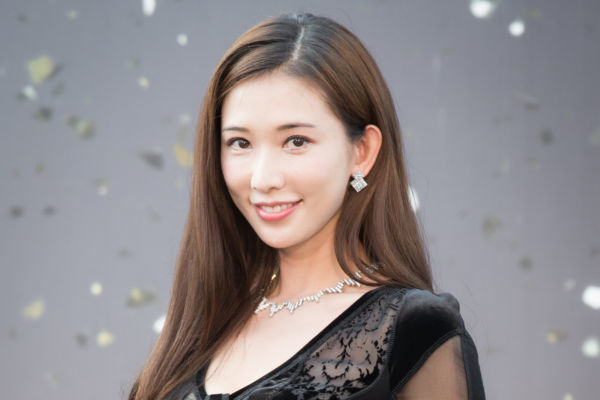

In [137]:
img

In [138]:
import numpy
imgary = numpy.array(img)
#imgary
imgary = imgary / 255
imgary.shape

(400, 600, 3)

In [139]:
original_bytes = imgary.nbytes

In [140]:
original_bytes

5760000

In [141]:
img_red   = imgary[:, :, 0]
img_green = imgary[:, :, 1]
img_blue  = imgary[:, :, 2]

In [142]:
from numpy.linalg import svd

U_r, S_r, V_r = svd(img_red, full_matrices=True)
U_g, S_g, V_g = svd(img_green, full_matrices=True)
U_b, S_b, V_b = svd(img_blue, full_matrices=True)

In [143]:
U_r.shape, S_r.shape, V_r.shape

((400, 400), (400,), (600, 600))

In [144]:
k = 50

In [145]:

U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

S_r_k = S_r[0:k]
S_g_k = S_g[0:k]
S_b_k = S_b[0:k]

In [146]:
U_r_k.shape, S_r_k.shape, V_r_k.shape

((400, 50), (50,), (50, 600))

In [147]:
compressed_bytes = sum([matrix.nbytes for matrix in 
                        [U_r_k, S_r_k, V_r_k, U_g_k, S_g_k, V_g_k, U_b_k, S_b_k, V_b_k]])
ratio = compressed_bytes / original_bytes
ratio

0.20854166666666665

In [148]:
image_red_approx   = np.dot(U_r_k, np.dot(numpy.diag(S_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(numpy.diag(S_g_k), V_g_k))
image_blue_approx  = np.dot(U_b_k, np.dot(numpy.diag(S_b_k), V_b_k))

In [149]:

row, col, _ = imgary.shape
img_reconstructed = np.zeros((row, col, 3))

img_reconstructed[:, :, 0] = image_red_approx
img_reconstructed[:, :, 1] = image_green_approx
img_reconstructed[:, :, 2] = image_blue_approx

In [150]:

img_reconstructed[img_reconstructed < 0] = 0
img_reconstructed[img_reconstructed > 1] = 1

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rec', 'text', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


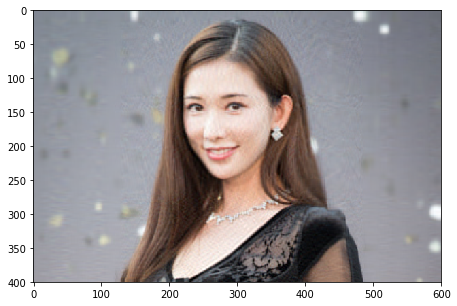

In [153]:
%pylab inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,5))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(img_reconstructed)

## 將字詞的相似度表現在平面圖上

In [154]:
W.shape

(7, 7)

In [156]:
%pylab inline
# SVD
U, S, V = np.linalg.svd(W)

U[word_id, 0]
U[word_id, 1]

Populating the interactive namespace from numpy and matplotlib


-0.6284886

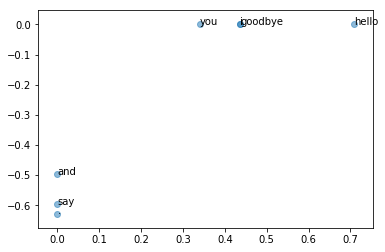

In [157]:
# plot
from matplotlib import pyplot as plt
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

## 推論手法

In [158]:
c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7, 3)
h = np.dot(c,W)
print(h)

[[-0.50618768 -0.1209649  -0.06839237]]


In [160]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

In [161]:
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

W_in  = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s)

[[-0.06487498  0.83146067  1.00243341  0.87744719 -0.33572033  0.34261917
   0.39432273]]


In [162]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)
    return np.array(contexts), np.array(target)

In [163]:

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
contexts, target = create_contexts_target(corpus, 1)
print(contexts, target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]] [1 2 3 4 1 5]


In [165]:
def convert_one_hot(corpus, vocab_size):
    N = corpus.shape[0]

    if corpus.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1
    elif corpus.ndim == 2:
        C = corpus.shape[1]
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1
    return one_hot

In [166]:
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, 1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [168]:
contexts.shape

(6, 2, 7)

In [167]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]])

In [169]:
target.shape

(6, 7)

In [171]:
target

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]])

In [172]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx


class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx


class Softmax:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        self.out = softmax(x)
        return self.out

    def backward(self, dout):
        dx = self.out * dout
        sumdx = np.sum(dx, axis=1, keepdims=True)
        dx -= self.out * sumdx
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx


class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx


class SigmoidWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.loss = None
        self.y = None 
        self.t = None 

    def forward(self, x, t):
        self.t = t
        self.y = 1 / (1 + np.exp(-x))

        self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = (self.y - self.t) * dout / batch_size
        return dx


class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.params, self.grads = [], []
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None

    def forward(self, idx):
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out

    def backward(self, dout):
        dW, = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)
        return None

In [173]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [175]:
vocab_size = len(word_to_id)
hidden_size = 5
model = SimpleCBOW(vocab_size, hidden_size)

In [176]:

class Adam:
    '''
    Adam (http://arxiv.org/abs/1412.6980v8)
    '''
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for i in range(len(params)):
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])
            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])
            
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)

In [177]:
optimizer = Adam()

In [179]:
class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
       
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

              
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 共有された重みを1つに集約
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| epoch %d |  iter %d / %d | time %d[s] | loss %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('iterations (x' + str(self.eval_interval) + ')')
        plt.ylabel('loss')
        plt.show()

In [184]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [188]:
def remove_duplicate(params, grads):
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                if params[i] is params[j]:
                    grads[i] += grads[j]  
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads

In [189]:
trainer = Trainer(model, optimizer)

In [190]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

In [192]:
window_size = 1
batch_size = 3
max_epoch = 10
trainer.fit(contexts, target, max_epoch, batch_size)


| epoch 1001 |  iter 1 / 2 | time 0[s] | loss 0.73
| epoch 1002 |  iter 1 / 2 | time 0[s] | loss 0.46
| epoch 1003 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 1004 |  iter 1 / 2 | time 0[s] | loss 0.27
| epoch 1005 |  iter 1 / 2 | time 0[s] | loss 0.76
| epoch 1006 |  iter 1 / 2 | time 0[s] | loss 0.59
| epoch 1007 |  iter 1 / 2 | time 0[s] | loss 0.76
| epoch 1008 |  iter 1 / 2 | time 0[s] | loss 0.43
| epoch 1009 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 1010 |  iter 1 / 2 | time 0[s] | loss 0.44


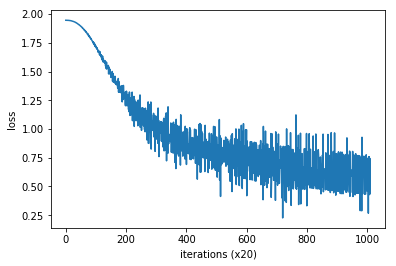

In [193]:
trainer.plot()

In [195]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 0.93299663 -0.9748342  -0.95833254 -1.7350678   0.9582054 ]
say [-1.0634269  1.1161886  1.09925   -1.2952496 -1.1296986]
goodbye [ 1.0338062 -1.0209832 -1.0482408  0.6666224  1.0287851]
and [-1.1565253   0.9462518   0.9653014  -1.4203925  -0.77599007]
i [ 1.0336033 -1.0235652 -1.0232536  0.6604798  1.0349357]
hello [ 0.94520205 -0.9925343  -0.9483445  -1.7222366   0.94806457]
. [-0.4936089   0.9211346   0.9262686  -0.48640436 -1.1456988 ]


In [204]:
word_to_id['you']
word_vecs[0]
for i in range(7):
    cs = cosine_distances([word_vecs[0], word_vecs[i]])
    print(cs[0][1])

5.9604645e-08
1.2981722
0.50165915
1.1941304
0.5003123
6.055832e-05
1.5175614


## 使用Gensim 建立詞向量

In [205]:
import pandas
df = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/20171003_applenews.xlsx')

In [206]:
corpus = []
titles = []
for rec in df.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1].content)))
    titles.append(rec[1].title)

In [208]:
! pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org gensim

  Running setup.py bdist_wheel for gensim: started
  Running setup.py bdist_wheel for gensim: finished with status 'done'
  Stored in directory: D:\Users\nc20\AppData\Local\pip\Cache\wheels\2c\19\c6\bf38e867cb6e75999e3ff80302eb27bdf488b333efadfbfed7
  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: D:\Users\nc20\AppData\Local\pip\Cache\wheels\5f\ea\fb\5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built gensim smart-open


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [209]:
from gensim.models import word2vec

In [ ]:
num_features = 10
min_word_count = 10
#num_workers = 4
context = 10
epoch = 20
sample = 1e-5
model = word2vec.Word2Vec(corpus,
                          sample = sample,
                          size = num_features,
                          min_count=min_word_count,
                          window = context,
                          iter = epoch)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [ ]:
for ele in model.vocab:
    print ele

In [ ]:
for w in model.most_similar('呂忠吉'.decode('utf-8')):
    print w[0], w[1]